# **Title of Project**

BIG-MART_SALES_PREDICTION

## **Objective**

The objective of big-mart_sales_prediction model is to predict sales of a big grocery store or super market,also find out which particular product is selling most by the particular store.

To predict the future sales from given data using Machine Learning Techniques.

## **Data Source**

The data set of this model is taken from github. From this dataets We have train (8523) and test (5681) data set, train data set has both input and output variable(s) by this we predict the sales for test data set.

In this Project, there is labeled sales data that provide information such as item type, item price, outlet type, etc. These data will be used to train and improve the model for Machine Learning. 
There are 8523 entries and12 attributes. The dataset has been properly divided into training and testing data.

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

- Seaborn is a library used for making statistical graphics

- Seaborn helps to visualize the statistical relationships, To understand how variables in a dataset are related to one another and how that relationship is dependent on other variables

- Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. 

## **Import Data**

In [2]:
grocery_data_train = pd.read_csv("https://raw.githubusercontent.com/Priyanshu-Modi/Sales_Prediction/main/Train.csv") 
grocery_data_test = pd.read_csv("https://raw.githubusercontent.com/Priyanshu-Modi/Sales_Prediction/main/Test.csv") 

## **Describe Data**

In [3]:
#train dataset

grocery_data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
grocery_data_train.shape

(8523, 12)

In [5]:
grocery_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
grocery_data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
#test dataset

grocery_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
grocery_data_test.shape

(5681, 11)

In [9]:
grocery_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [10]:
grocery_data_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

Item_Identifier:             Unique product ID

Item_Weight:                 Weight of product

Item_Fat_Content:            Whether the product is low fat or not

Item_Visibility:             The % of total display area of all products in store allocated to the particular product

Item_Type:                   The category to which the product belongs

Item_MRP:                    Maximum Retail Price (list price) of the product

Outlet_Identifier:           Unique store ID

Outlet_Establishment_Year:   The year in which store was established

Outlet_Size:                 The size of the store in terms of ground area covered

Outlet_Location_Type:        The type of city in which the store is located

Outlet_Type:                 Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales:           Sales of the product in the particulat store. This is the outcome variable to be predicted.

## **Data Visualization**

In [11]:
#train

grocery_data_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


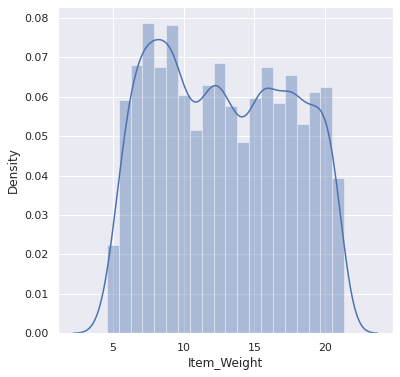

In [13]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(grocery_data_train['Item_Weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


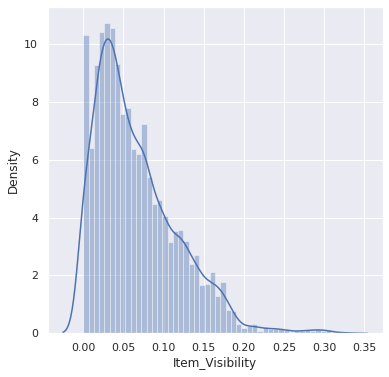

In [14]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(grocery_data_train['Item_Visibility'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


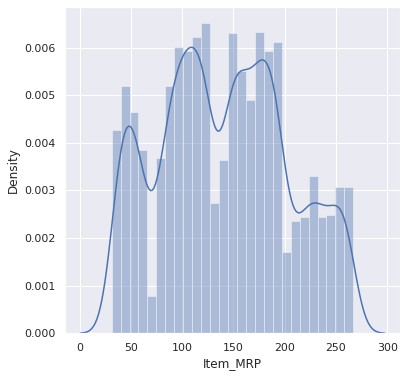

In [15]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(grocery_data_train['Item_MRP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


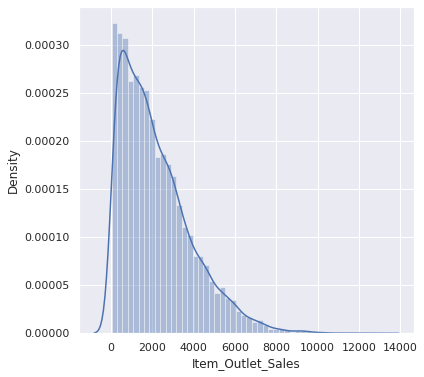

In [16]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(grocery_data_train['Item_Outlet_Sales'])
plt.show()

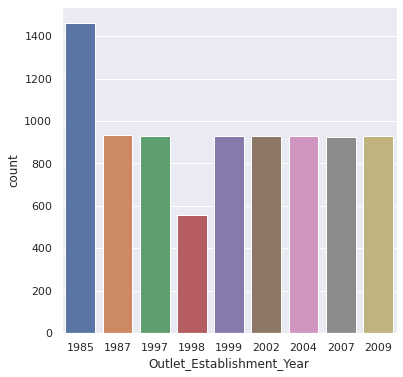

In [17]:
# Outlet_Establishment_Year column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=grocery_data_train)
plt.show()

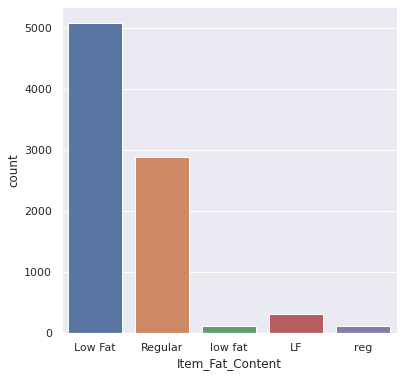

In [18]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=grocery_data_train)
plt.show()

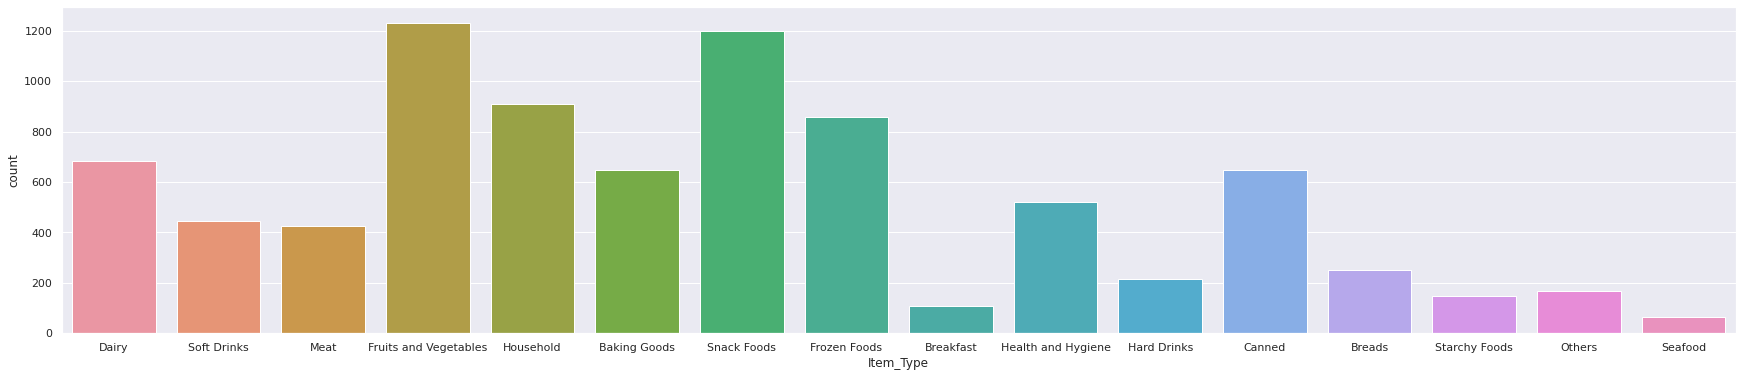

In [19]:
# Item_Type column
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=grocery_data_train)
plt.show()

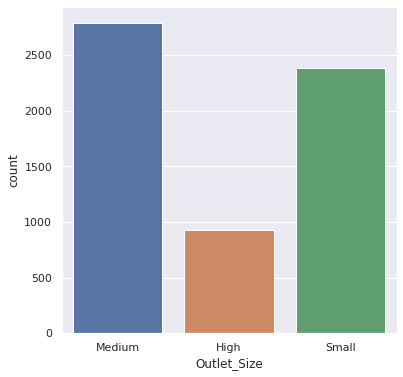

In [20]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=grocery_data_train)
plt.show()

## **Data Preprocessing**

In [21]:
## Checking For Missing Values

# train dataset
grocery_data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [22]:
# Mean value of "Item_Weight" column

grocery_data_train["Item_Weight"].mean()

12.857645184136183

In [23]:
# Filling the missing values in "item weight" column with "Mean" value

grocery_data_train["Item_Weight"].fillna(grocery_data_train["Item_Weight"].mean() , inplace = True)

In [24]:
grocery_data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [25]:
# mode of "Outlet_Size" column

grocery_data_train['Outlet_Size'].mode()

0    Medium
dtype: object

In [26]:
# Replacing the missing values in "Outlet_Size" with Mode
mode_of_outlet_size = grocery_data_train.pivot_table(values="Outlet_Size" , columns = "Outlet_Type" , aggfunc = (lambda x: x.mode()[0]))

In [27]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [28]:
missing_values = grocery_data_train["Outlet_Size"].isnull()

In [29]:
grocery_data_train.loc[missing_values,"Outlet_Size"] = grocery_data_train.loc[missing_values , "Outlet_Type"].apply(lambda x: mode_of_outlet_size[x])

In [30]:
# checking for missing values

grocery_data_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [31]:
grocery_data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [32]:
# changing to similar category

grocery_data_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [33]:
grocery_data_train.replace({"Item_Fat_Content" : {"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)

In [34]:
grocery_data_train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [35]:
#Label Encoding

encoder = LabelEncoder()

In [36]:
grocery_data_train["Item_Identifier"] = encoder.fit_transform(grocery_data_train["Item_Identifier"])

grocery_data_train["Item_Fat_Content"] = encoder.fit_transform(grocery_data_train["Item_Fat_Content"])

grocery_data_train["Item_Type"] = encoder.fit_transform(grocery_data_train["Item_Type"])

grocery_data_train["Outlet_Identifier"] = encoder.fit_transform(grocery_data_train["Outlet_Identifier"])

grocery_data_train["Outlet_Size"] = encoder.fit_transform(grocery_data_train["Outlet_Size"])

grocery_data_train["Outlet_Location_Type"] = encoder.fit_transform(grocery_data_train["Outlet_Location_Type"])

grocery_data_train["Outlet_Type"] = encoder.fit_transform(grocery_data_train["Outlet_Type"])

In [37]:
grocery_data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [38]:
# test dataset

grocery_data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [39]:
grocery_data_test["Item_Weight"].mean()

12.695633368756374

In [40]:
grocery_data_test["Item_Weight"].fillna(grocery_data_test["Item_Weight"].mean() , inplace = True)

In [41]:
grocery_data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [42]:
grocery_data_test['Outlet_Size'].mode()

0    Medium
dtype: object

In [43]:
mode_of_outlet_size = grocery_data_test.pivot_table(values="Outlet_Size" , columns = "Outlet_Type" , aggfunc = (lambda x: x.mode()[0]))

In [44]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [45]:
missing_values = grocery_data_test["Outlet_Size"].isnull()

In [46]:
grocery_data_test.loc[missing_values,"Outlet_Size"] = grocery_data_test.loc[missing_values , "Outlet_Type"].apply(lambda x: mode_of_outlet_size[x])

In [47]:
grocery_data_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [48]:
grocery_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [49]:
grocery_data_test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [50]:
grocery_data_test.replace({"Item_Fat_Content" : {"low fat":"Low Fat","LF":"Low Fat","reg":"Regular"}},inplace=True)

In [51]:
grocery_data_test["Item_Fat_Content"].value_counts()

Low Fat    3668
Regular    2013
Name: Item_Fat_Content, dtype: int64

In [52]:
encoder = LabelEncoder()

In [53]:
grocery_data_test["Item_Identifier"] = encoder.fit_transform(grocery_data_test["Item_Identifier"])

grocery_data_test["Item_Fat_Content"] = encoder.fit_transform(grocery_data_test["Item_Fat_Content"])

grocery_data_test["Item_Type"] = encoder.fit_transform(grocery_data_test["Item_Type"])

grocery_data_test["Outlet_Identifier"] = encoder.fit_transform(grocery_data_test["Outlet_Identifier"])

grocery_data_test["Outlet_Size"] = encoder.fit_transform(grocery_data_test["Outlet_Size"])

grocery_data_test["Outlet_Location_Type"] = encoder.fit_transform(grocery_data_test["Outlet_Location_Type"])

grocery_data_test["Outlet_Type"] = encoder.fit_transform(grocery_data_test ["Outlet_Type"])

In [54]:
grocery_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,0,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,1,0.038428,4,87.3198,2,2007,2,1,1
2,1406,14.600000,0,0.099575,11,241.7538,0,1998,2,2,0
3,809,7.315000,0,0.015388,13,155.0340,2,2007,2,1,1
4,1184,12.695633,1,0.118599,4,234.2300,5,1985,1,2,3


## **Define Target Variable (y) and Feature Variables (X)**

In [55]:
grocery_data_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [56]:
X = grocery_data_train[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

X.shape

(8523, 11)

In [57]:
y = grocery_data_train['Item_Outlet_Sales']
y.shape

(8523,)

In [58]:
print(X)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [59]:
print(y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


## **Train Test Split**

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [61]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


## **Modeling**

SUPERVISED LEARNING:

- It is defined by its use of labeled datasets to train algorithms that to classify data or predict outcomes accurately.

- Basically supervised learning is when we teach or train the machine using data that is well labeled.

- In this particular project, the labels are the target which is more precise.

- In this case the targets are sales amount

REGRESSION:

- Regression means predicting a particular value especially continuous value (i.e.sales)

# 1-Algorithm : Linear Regression 

---



In [62]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(X_train, y_train)

LinearRegression()

In [63]:
y_pred = model1.predict(X_train)

# Model Evaluation

In [64]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_train,y_pred))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_train,y_pred))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_train,y_pred)))
print("R^2 value",r2_score(y_train,y_pred))

MEAN SQUARED ERROR(MSE) 1412891.985776297
MEAN ABSOLUTE ERROR(MAE) 891.8379831319257
ROOT MEAN SQUARED ERROR(RMSE) 1188.6513306164668
R^2 value 0.5071929167339232


## **Prediction**

In [65]:
y_pred_test = model1.predict(X_test)

In [66]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_pred_test})
Linear_Regression.to_csv("Linear Regression.csv") 

In [67]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999,1, 0, 1)
print("The sales for the first product in the dataset is predicted as ", y_pred[0])

The sales for the first product in the dataset is predicted as  2412.799201136306


In [68]:
print("Thus we have built the model to predict the sales & have performed the evaluation successfully")

Thus we have built the model to predict the sales & have performed the evaluation successfully


# 2-Algorithm : XGB Regression  

---



In [69]:
from xgboost import XGBRegressor

model2 = XGBRegressor()

model2.fit(X_train, y_train)

[10:32:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [70]:
y_pred = model2.predict(X_train)

# Model Evaluation

In [71]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_train,y_pred))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_train,y_pred))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_train,y_pred)))
print("R^2 value",r2_score(y_train,y_pred))

MEAN SQUARED ERROR(MSE) 1042320.5549086935
MEAN ABSOLUTE ERROR(MAE) 719.4796136737632
ROOT MEAN SQUARED ERROR(RMSE) 1020.9410144120441
R^2 value 0.6364457030941357


## **Prediction**

In [72]:
y_pred_test = model2.predict(X_test)

In [73]:
XGB_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_pred_test})
XGB_Regression.to_csv("XGB Regression.csv")

In [74]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999,1, 0, 1)
print("The sales for the first product in the dataset is predicted as ", y_pred[0])

The sales for the first product in the dataset is predicted as  2418.3772


In [75]:
print("Thus we have built the model to predict the sales & have performed the evaluation successfully")

Thus we have built the model to predict the sales & have performed the evaluation successfully


# 3-Algoritm : Random Forest Regression

---



In [76]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(max_depth=2, random_state=1)

model3.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=1)

In [77]:
y_pred = model3.predict(X_train)

# Model Evaluation

In [78]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_train,y_pred))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_train,y_pred))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_train,y_pred)))
print("R^2 value",r2_score(y_train,y_pred))

MEAN SQUARED ERROR(MSE) 1545330.1603426393
MEAN ABSOLUTE ERROR(MAE) 897.2614405484595
ROOT MEAN SQUARED ERROR(RMSE) 1243.1130923381988
R^2 value 0.4609993851843315


## **Prediction**

In [79]:
y_pred_test = model3.predict(X_test)

In [80]:
Random_Forest_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_pred_test})
Random_Forest_Regression.to_csv("Random Forest Regression.csv")  

In [81]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999,1, 0, 1)
print("The sales for the first product in the dataset is predicted as ", y_pred[0])

The sales for the first product in the dataset is predicted as  2538.9689503931863


In [82]:
print("Thus we have built the model to predict the sales & have performed the evaluation successfully")

Thus we have built the model to predict the sales & have performed the evaluation successfully


# 4-Algoritm : Decision Tree Regression

---



In [83]:
from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor(max_depth=2, random_state=1)

model4.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=1)

In [84]:
y_pred = model4.predict(X_train)

# Model Evaluation

In [85]:
print("MEAN SQUARED ERROR(MSE)",mean_squared_error(y_train,y_pred))
print("MEAN ABSOLUTE ERROR(MAE)",mean_absolute_error(y_train,y_pred))
print("ROOT MEAN SQUARED ERROR(RMSE)",np.sqrt(mean_squared_error(y_train,y_pred)))
print("R^2 value",r2_score(y_train,y_pred))

MEAN SQUARED ERROR(MSE) 1620595.1943204917
MEAN ABSOLUTE ERROR(MAE) 918.1040361514492
ROOT MEAN SQUARED ERROR(RMSE) 1273.0259990748389
R^2 value 0.43474745493067635


## **Prediction**

In [86]:
y_pred_test = model4.predict(X_test)

In [87]:
Decision_Tree_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_pred_test})
Decision_Tree_Regression.to_csv("Decision Tree Regression.csv")    

In [88]:
input_data = (156, 9.300, 0, 0.016047, 4, 249.8092, 9, 1999,1, 0, 1)
print("The sales for the first product in the dataset is predicted as ", y_pred[0])

The sales for the first product in the dataset is predicted as  3373.785905434786


In [89]:
print("Thus we have built the model to predict the sales & have performed the evaluation successfully")

Thus we have built the model to predict the sales & have performed the evaluation successfully


## **Explaination**

Sales forecasting plays a important role in the business sector in every field. With the help of the sales forecasts, sales revenue analysis will help to get the details needed to estimate both the revenue and the income.

Different types of Machine Learning techniques such as XGB Regression, Simple Linear Regression, Decision Tree Regression and Random Forest Regression have been evaluated on food sales data to find the critical factors that influence sales to provide a solution for forecasting
sales.  
After performing metrics such as root mean square error, mean absolute error,  r2 score and mean squared error, the Random Forest Regression is found to be the appropriate algorithm according to the collected data.

XGBoost Regression is the most appropriate algorithm for forecasting the
product sales. When compared to the Simple Linear Regression, Decision Tree Regression and Random Forest Regression, XG Boosting
Regression technique will produce the least error while predicting the product sales. Root mean square error, mean absolute error and r2 score for the XG Boost Regressor is 1020.94, 719.47 and 63.64 percent respectively which is quite impressive compared to other techniques. 

Decision Tree Regressor produced the very poor results compared to the other techniques. Root mean square error, mean absolute error and r2 score is 1273.02, 918.10 and 43.47 percent respectively which is the poor one.